# <font color='#0044FB'>Introduction</font> 


The Ames Housing dataset was created in 2011 and compiled by Dean De Cock for use in data science education.

The dataset contains various explanatory variables describing almost every aspect of residential homes in Ames, Iowa, USA.

Each column of the dataset describes a characteristic of a house. A short descriptions of all the features is shown below.

## <font color=' #FD9404'>Business Case</font> 


The objective of this study is to create a model to predict properties **Overall Quality**. In this kernel various types of ML classification algorithms will be used and compared in order to find the best performing one.

This kernel can be divided into 3 main parts:

1. EDA and Data Cleaning
2. Feature Engineering Part
    - 2.a Engineering
    - 2.b Encoding
    - 2.c Scaling
3. Machine Learning Classification Algorithms
    - 3.a Random Forest
    - 3.b Logistic Regression
    - 3.c K-Nearest Neighbour
    - 3.d SVM-C

## <font color=' #FD9404'>Key information about data fields</font> 



- SalePrice - the property's sale price in dollars.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $ Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

#  <font color='#0044FB'>Dataset & Libraries Loading</font> 

In [1]:
!pip install mord

In [2]:
# Import all the necessary libraries (and some more, just in case...)

import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
import category_encoders as ce
from pandas import set_option
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC
from sklearn import metrics
from sklearn.metrics import r2_score, make_scorer,mean_absolute_error
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.model_selection import cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.feature_selection import VarianceThreshold
from warnings import simplefilter
import warnings
from mord import LogisticAT
from imblearn.over_sampling import SMOTE
warnings.filterwarnings("ignore")
import pycountry_convert as pc

In [3]:
# Import the function files

import sys
sys.path.insert(0, '../../DS_module3/functions')

from functions_plot_EDA import *
from Functions_ML_classification_1 import *
from classification_functions_new import *

In [4]:
# Load the dataset

df = pd.read_csv("../datasets/P2. dataset.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# <font color='#0044FB'>Exploratory Data Analysis</font> 

In [5]:
# An overall look at the data

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df.shape

(1460, 81)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#  <font color='#0044FB'>Data Cleaning</font> 

### Check for duplicates

In [10]:
# Do we have duplicates? No

df.duplicated().sum()

0

### Check for null values

In [11]:
# Do we have NaNs? Yes

nulls = df.isnull().sum() 
nulls = nulls[nulls > 0]
nulls

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [12]:
def missing_percentage(series, rowsnumber):
    df = pd.DataFrame(series) # add column names
    results = []
    for i in series:
            results.append(round(i/rowsnumber*100,2))
    df["percentage"] = results       
    return df

In [13]:
# Another way to calculate NaN's percentage

#total = df.isnull().sum().sort_values(ascending=False)
#percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
#missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
#missing_data.head(20)

In [14]:
missing_percentage(nulls, 1460)

,0,percentage
LotFrontage,259,17.74
Alley,1369,93.77
MasVnrType,8,0.55
MasVnrArea,8,0.55
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtExposure,38,2.60
BsmtFinType1,37,2.53
BsmtFinType2,38,2.60
Electrical,1,0.07


In [15]:
# 19 columns out of 81 have at least 1 null value and some have many more

len(nulls)

19

The dataset length is of 1460 rows which means that, in some cases, the NaNs account for the great majority of that specific column. 

This is the case for Alley, PoolQC, Fence and MiscFeature columns. In these columns the NaNs constitute at least the 80% of the data.

For the extent of my personal analysis, these columns cannot provide useful information.

In [16]:
# Drop the columns that have the most null values and Id because we don't need it

df.drop(["Alley", "Fence", "MiscFeature", "PoolQC", "Id"], axis=1, inplace=True)

In [17]:
df.shape

(1460, 76)

In [18]:
# The column FireplaceQu has almost a 50% of null values. Let's see if drop or replace

df.FireplaceQu.head()

0    NaN
1     TA
2     TA
3     Gd
4     TA
Name: FireplaceQu, dtype: object

This column indicates the fireplace quality. Seems to be an ordinal feature.
It indicates if the fireplace is manmade (masonry) or prefabricated and its location inside the house.

     Ex	Excellent - Exceptional Masonry Fireplace
     Gd	Good - Masonry Fireplace in main level
     TA	Average - Prefabricated Fireplace in main livingarea or Masonry Fireplace in basement
     Fa	Fair - Prefabricated Fireplace in basement
     Po	Poor - Ben Franklin Stove
     NA	No Fireplace

In [19]:
# Most fireplaces are of good or average quality

df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

We have no data for fireplaces of excellent quality or for houses that do not have a fireplace. That seems odd and not representative of the reality.

I initially thought to replace null values with the mode (most frequent value) which is "Good" even though this would alter and "pollute" the dataset with uncertain information.

In [20]:
df.FireplaceQu = df.FireplaceQu.fillna(df.FireplaceQu.mode().iloc[0])
df.FireplaceQu.value_counts()

Gd    1070
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [21]:
df.drop("FireplaceQu", axis=1, inplace=True)

In [22]:
# Now the column with most NaNs is LotFrontage. Let's see if drop or replace

df.LotFrontage.head()

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64

This columns indicates a linear street connected to property. Frontage is a measure: it's the width of a lot, measured at the front part of the lot. We can assume it is expressed in "feet".

It does not seem a super relevant feature but the NaNs are not so many as to drop it, at least for now.

In [23]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [24]:
# I replace the NaNs with the mean (average value)

df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())

In [25]:
# For the remaining columns the NaNs are not so many
# I replace them by the mode or the mean depending on the column's data type

for column in df: 
    if df[column].dtype != 'object':
        df[column] = df[column].fillna(df[column].mean())
    else:
        df[column] = df[column].fillna(df[column].mode().iloc[0])

In [26]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [27]:
df.shape

(1460, 75)

### Check for outliers

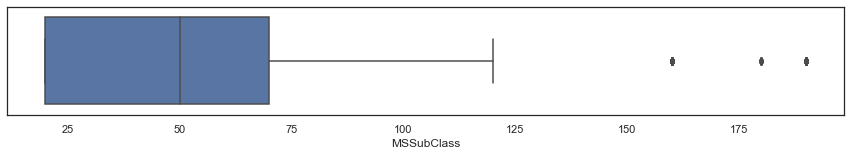

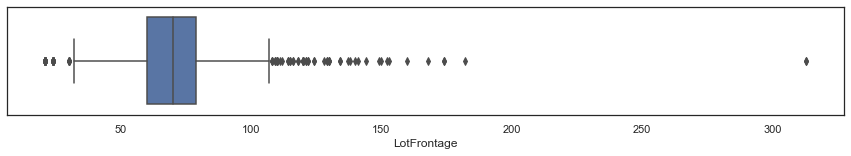

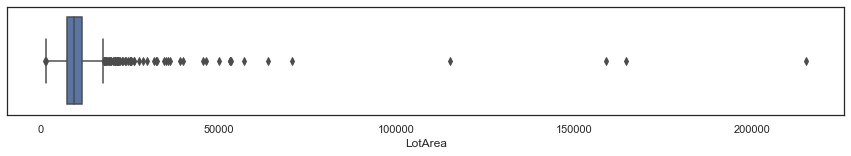

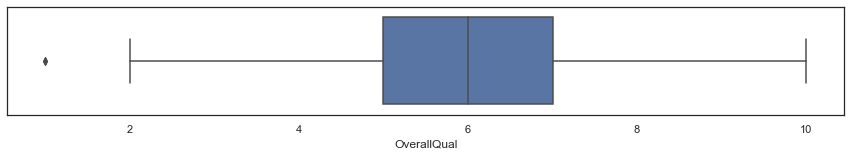

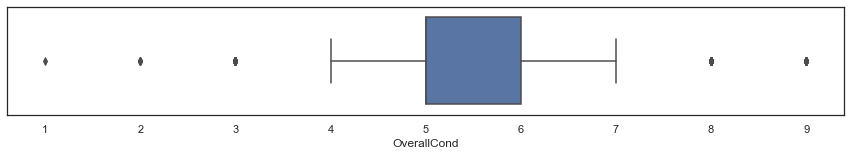

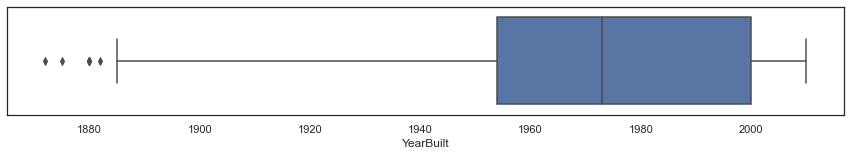

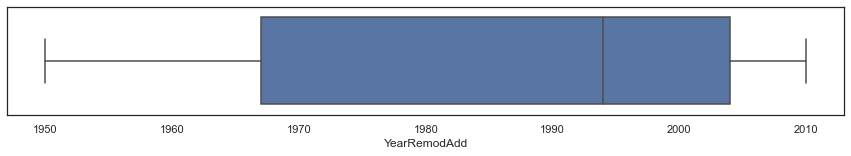

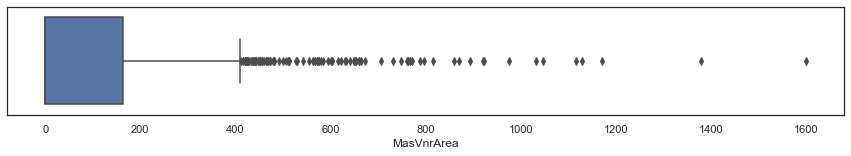

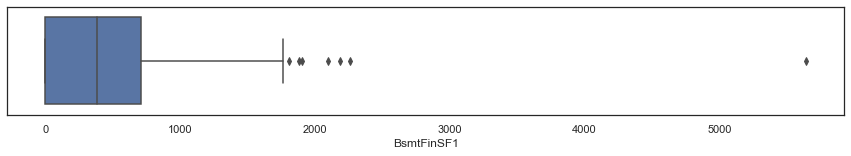

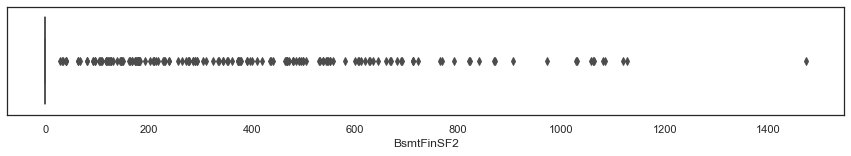

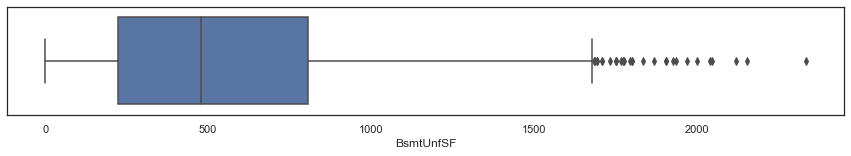

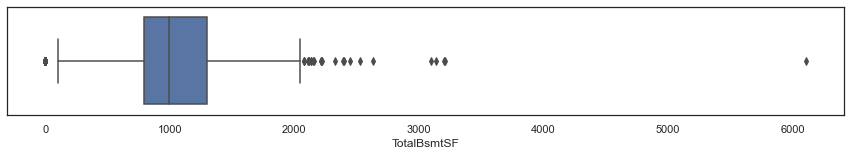

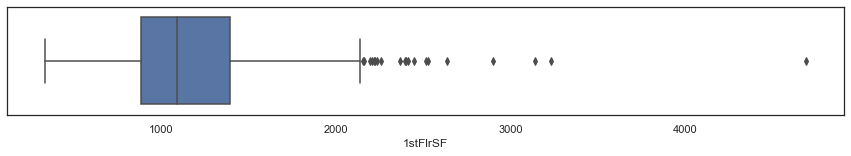

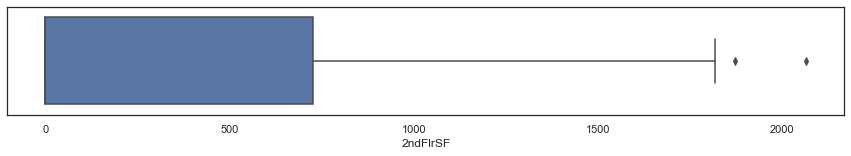

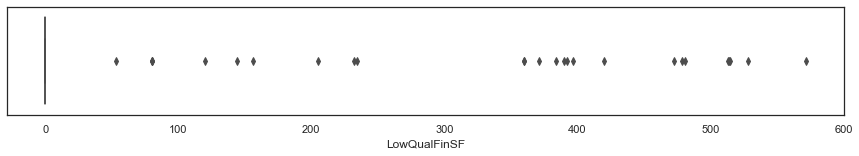

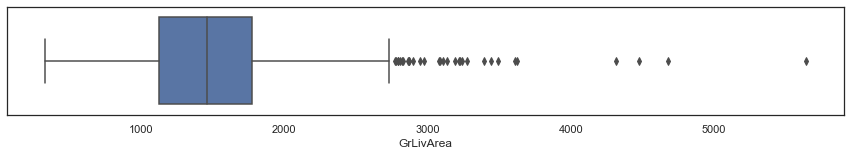

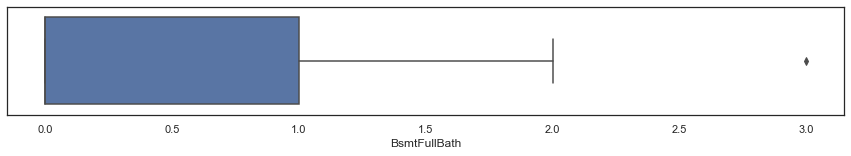

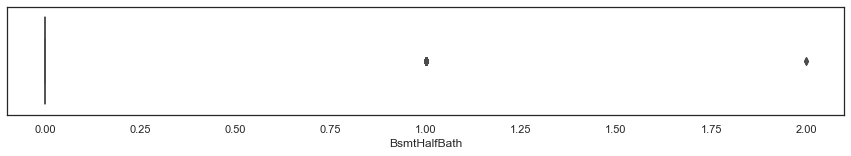

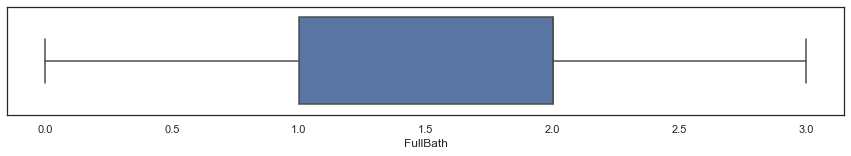

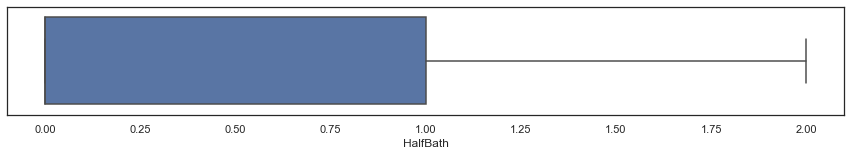

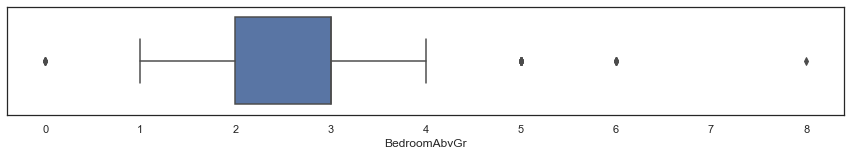

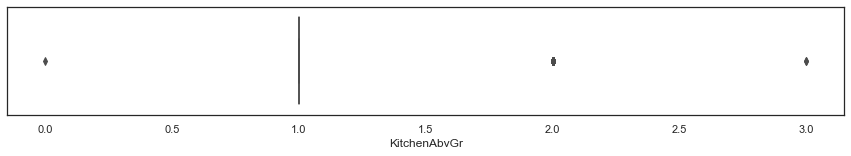

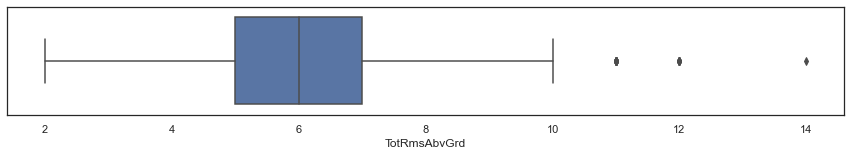

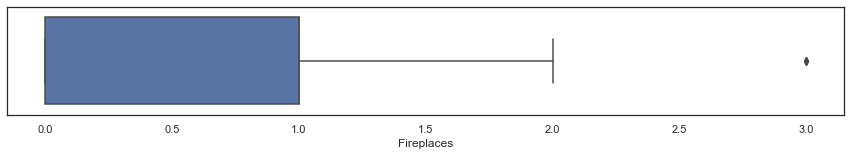

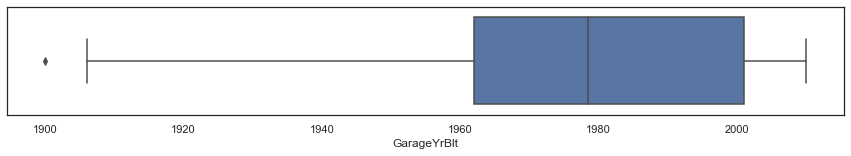

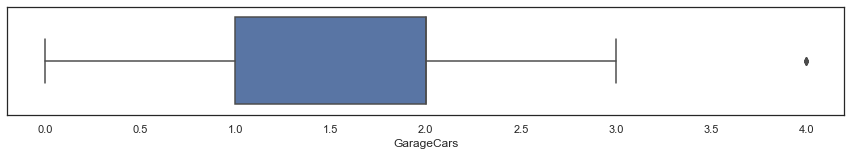

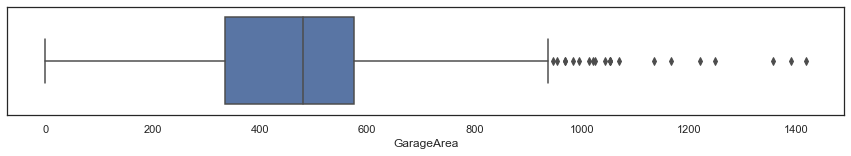

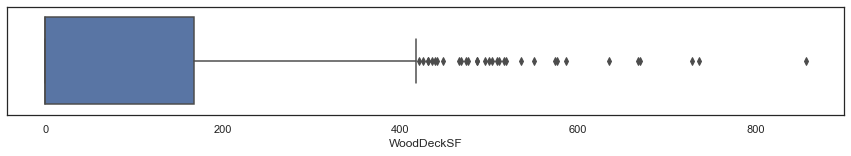

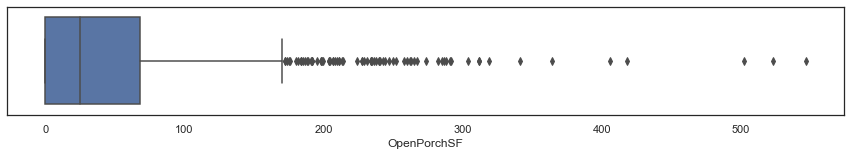

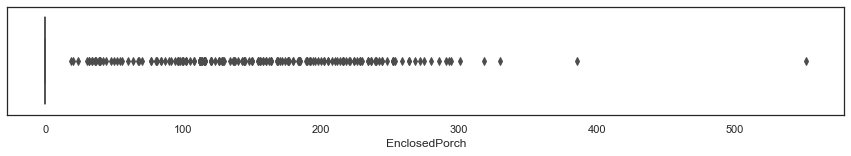

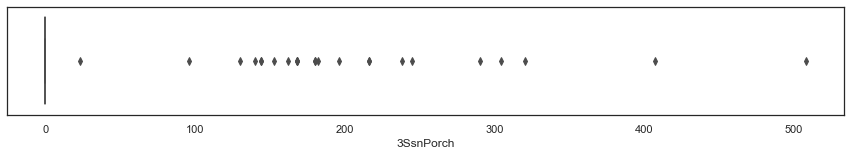

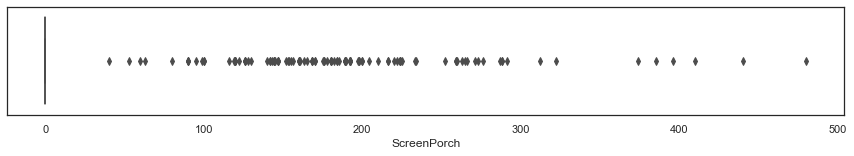

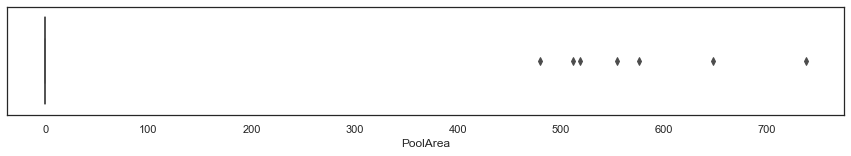

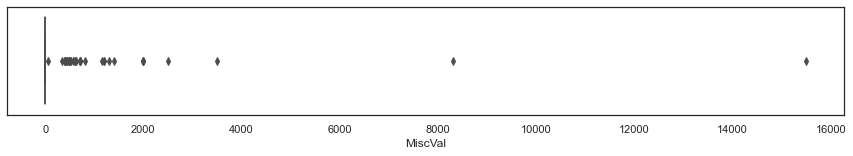

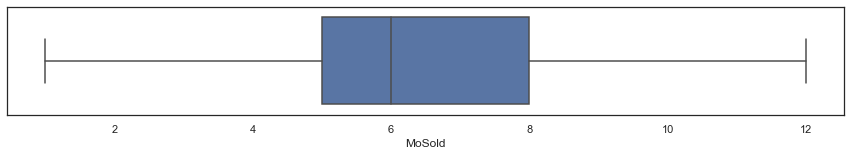

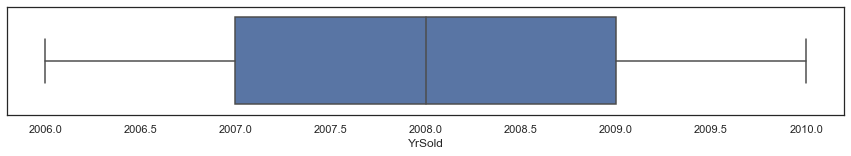

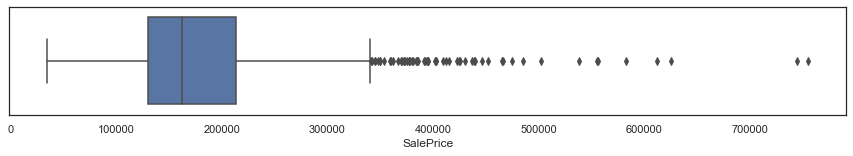

In [28]:
for col in df:
    if df[col].dtype == np.float64 or df[col].dtype == np.int64:
        fig_dims = (15, 2)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=df[col],ax=ax)

In [29]:
# Remove outliers

def remove_outliers(df):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower_bound  = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df.loc[(df[column] > lower_bound) & (df[column] <  upper_bound)]
    return df

In [30]:
df_ok = remove_outliers(df)

In [31]:
df_ok.shape

(1399, 75)

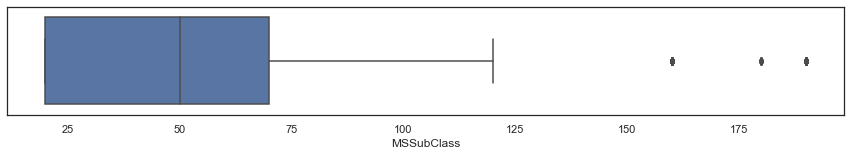

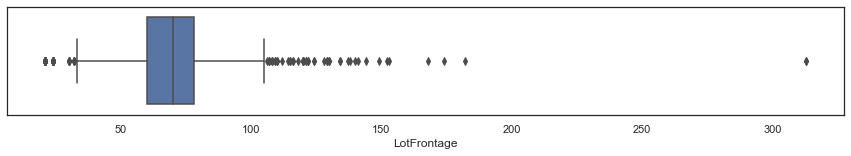

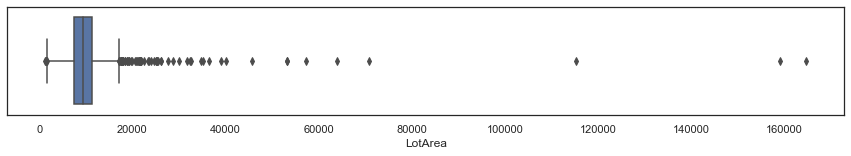

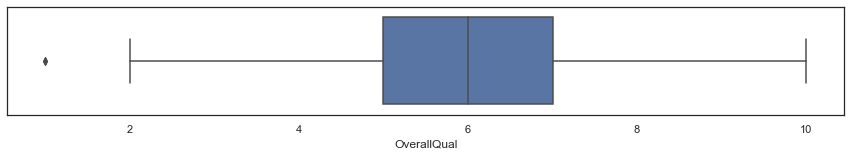

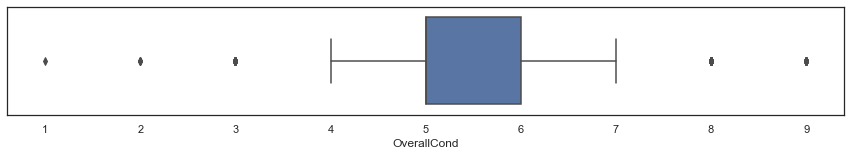

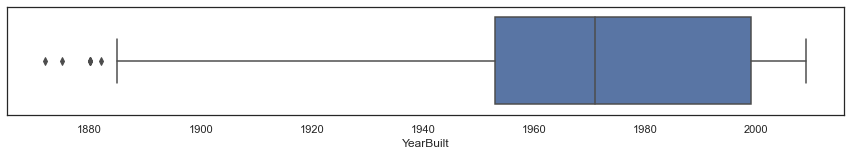

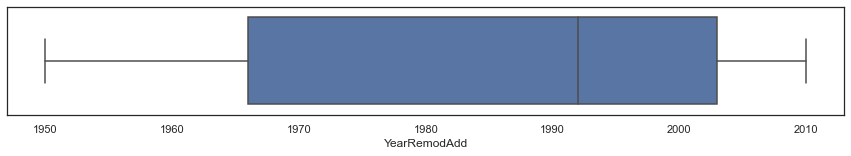

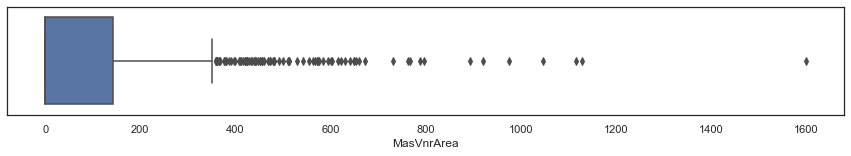

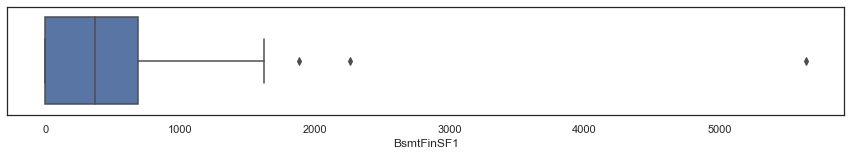

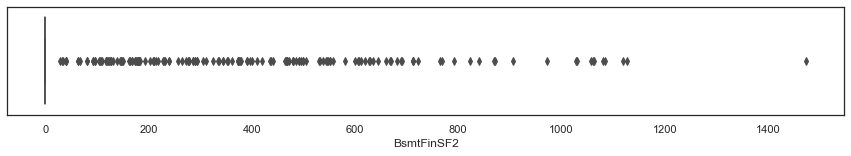

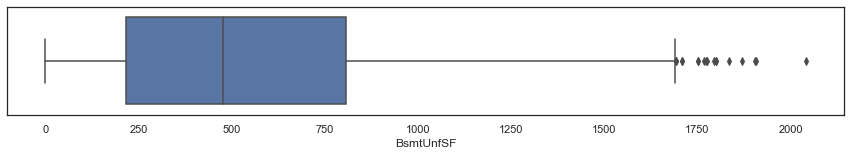

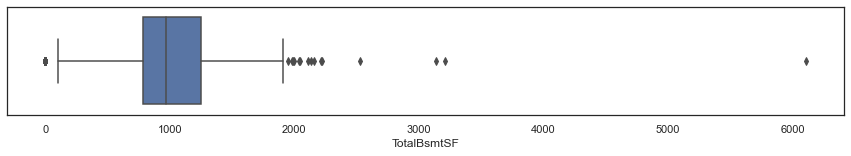

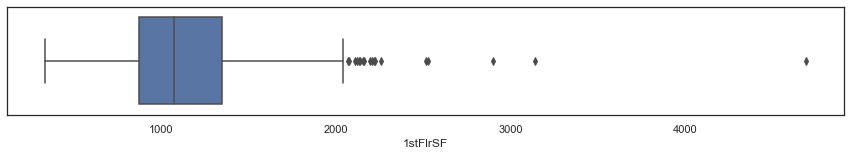

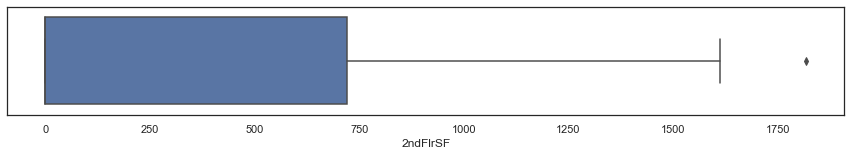

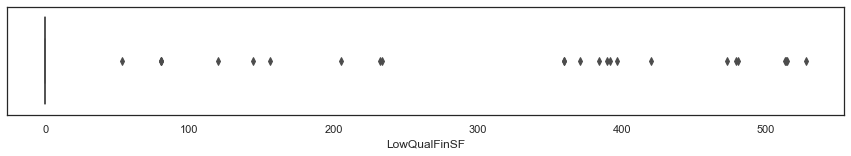

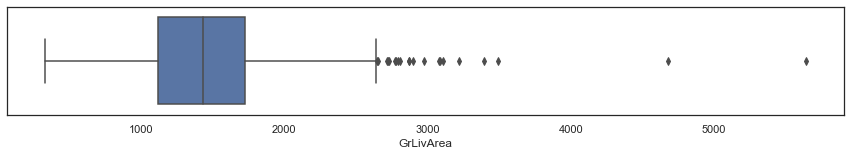

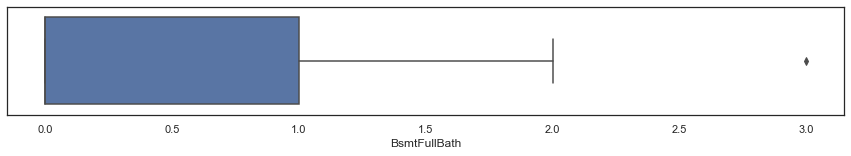

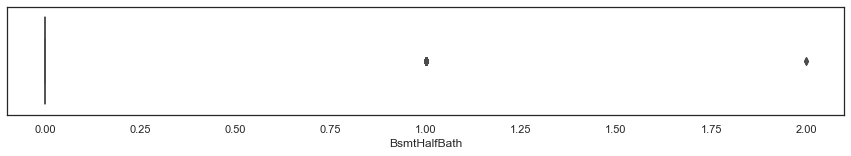

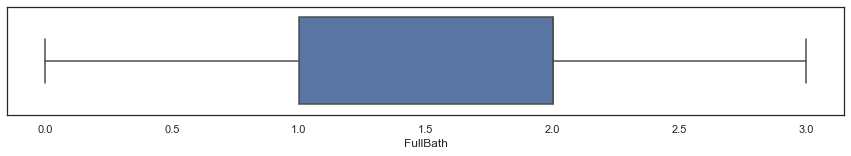

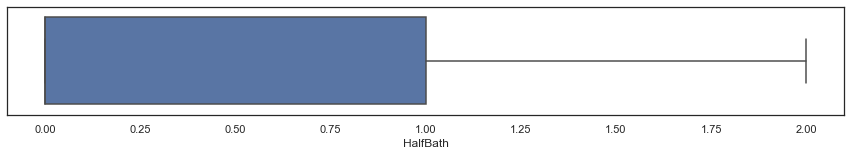

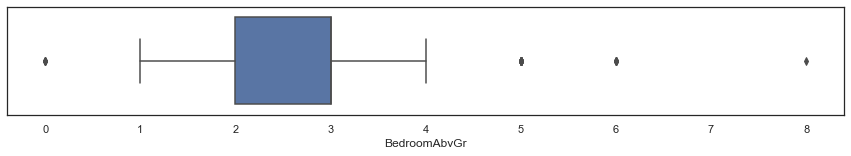

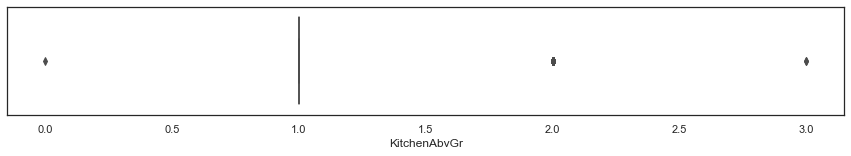

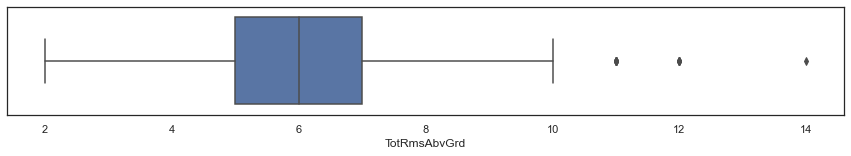

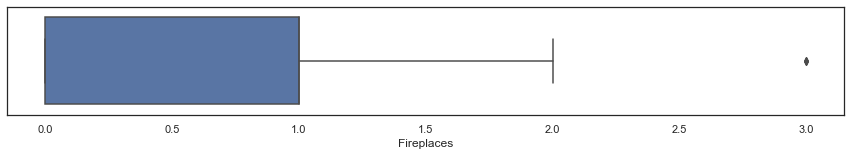

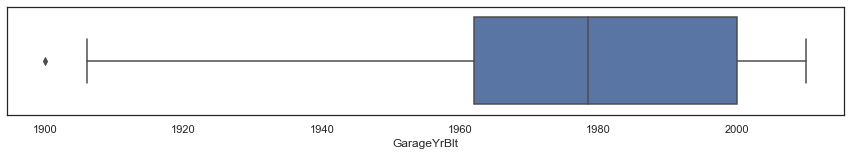

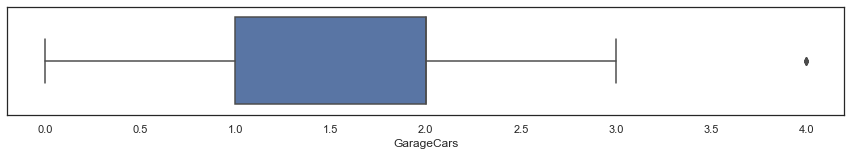

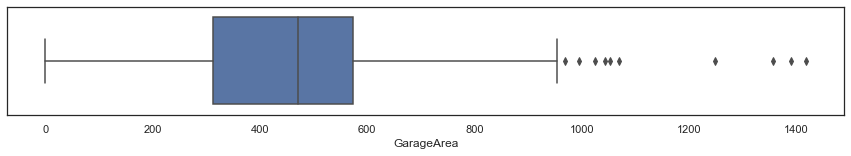

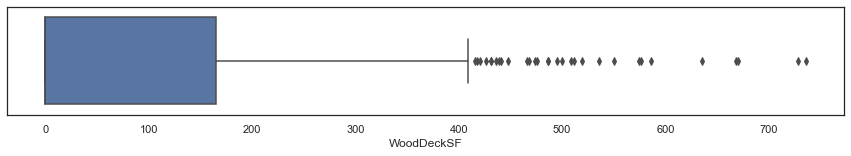

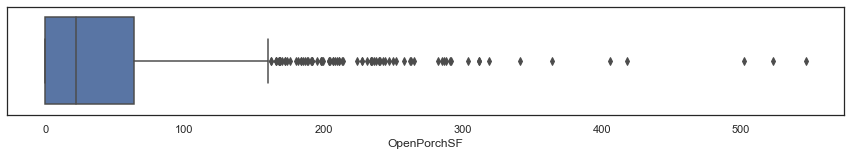

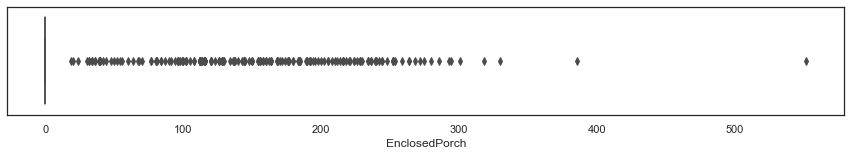

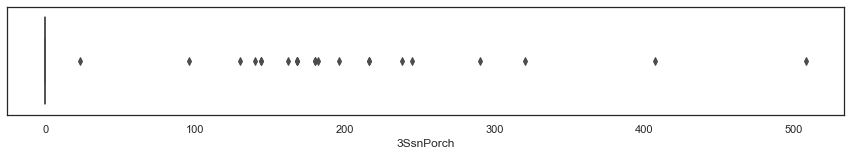

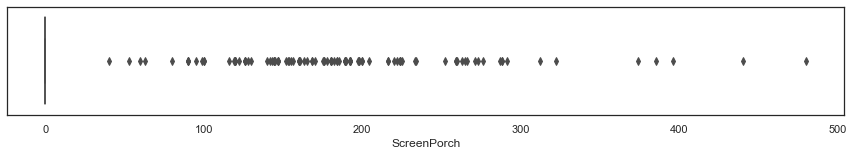

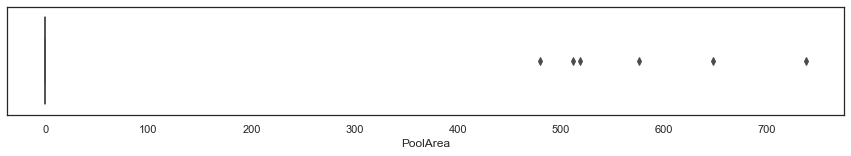

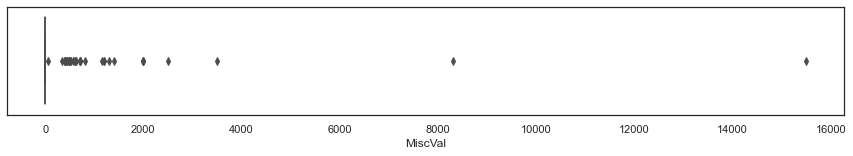

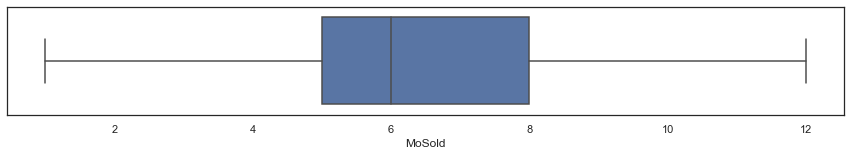

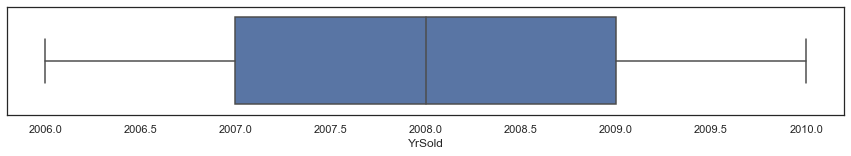

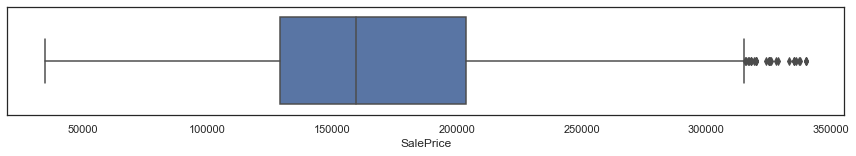

In [32]:
# Check again

for col in df_ok:
    if df_ok[col].dtype == np.float64 or df_ok[col].dtype == np.int64:
        fig_dims = (15, 2)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=df_ok[col],ax=ax)

In [33]:
# Remove manually the most evident outliers

df_ok = df_ok[df_ok['LotFrontage'] < 300]
df_ok = df_ok[df_ok['LotArea'] < 100000]
df_ok = df_ok[df_ok['MasVnrArea'] < 1400]
df_ok = df_ok[df_ok['TotalBsmtSF'] < 6000]

### Features selection

In [34]:
# There are some columns that are redundant or useless. Let's drop them

df_ok.drop(["Utilities","Condition1", "Condition2", "BsmtFinSF1", "BsmtFinSF2", "BsmtFinType2", "BsmtUnfSF", "GarageCond", "GarageArea",'BedroomAbvGr', 'KitchenAbvGr'], axis=1, inplace=True)

In [35]:
df_ok

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [36]:
# These column correspond to the value of miscellaneous feature in $
# Does not include relevant information as the majority of values is 0

df_ok.MiscVal.value_counts()

0        1343
400        11
500         7
700         4
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [37]:
df_ok.drop(["MiscVal"], axis=1, inplace=True)

### Statistical overview

In [38]:
df_ok.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1393.0,57.447954,42.724243,20.0,20.0,50.000000,70.0,190.0
LotFrontage,1393.0,68.890624,19.490313,21.0,60.0,70.049958,78.0,182.0
LotArea,1393.0,9812.988514,5118.656384,1300.0,7438.0,9313.000000,11302.0,70761.0
OverallQual,1393.0,5.979182,1.279367,1.0,5.0,6.000000,7.0,10.0
OverallCond,1393.0,5.590093,1.118979,1.0,5.0,5.000000,6.0,9.0
YearBuilt,1393.0,1970.053123,30.044938,1872.0,1953.0,1971.000000,1999.0,2009.0
YearRemodAdd,1393.0,1984.000000,20.662831,1950.0,1966.0,1992.000000,2003.0,2010.0
MasVnrArea,1393.0,88.322180,152.499907,0.0,0.0,0.000000,140.0,1129.0
TotalBsmtSF,1393.0,1019.887294,383.516639,0.0,788.0,972.000000,1248.0,3206.0
1stFlrSF,1393.0,1128.062455,343.327612,334.0,869.0,1067.000000,1342.0,3138.0


### Correlations analysis

In [39]:
df_ok.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
MSSubClass,1.000,-0.395,-0.294,0.070,-0.071,0.046,0.059,0.051,-0.243,-0.253,0.314,0.044,0.102,0.012,-0.010,0.149,0.184,0.056,-0.037,0.100,-0.019,-0.009,0.002,-0.015,-0.047,-0.035,0.007,-0.017,-0.021,-0.060
LotFrontage,-0.395,1.000,0.437,0.169,-0.049,0.093,0.044,0.122,0.286,0.340,0.046,0.043,0.296,0.044,0.003,0.147,0.028,0.282,0.197,0.033,0.253,0.068,0.103,0.017,0.073,0.047,0.072,0.018,0.008,0.321
LotArea,-0.294,0.437,1.000,0.095,-0.019,0.006,-0.006,0.061,0.266,0.358,0.072,0.006,0.328,0.103,0.041,0.140,0.045,0.271,0.302,-0.046,0.215,0.157,0.138,0.009,0.059,0.088,0.074,0.004,-0.032,0.315
OverallQual,0.070,0.169,0.095,1.000,-0.070,0.561,0.531,0.326,0.469,0.382,0.288,-0.050,0.535,0.062,-0.036,0.533,0.250,0.355,0.348,0.492,0.549,0.196,0.284,-0.105,0.029,0.053,0.025,0.078,-0.022,0.789
OverallCond,-0.071,-0.049,-0.019,-0.070,1.000,-0.361,0.093,-0.119,-0.156,-0.137,0.025,-0.001,-0.079,-0.039,0.115,-0.200,-0.057,-0.051,-0.021,-0.296,-0.175,0.007,-0.028,0.072,0.032,0.047,0.007,-0.004,0.049,-0.050
YearBuilt,0.046,0.093,0.006,0.561,-0.361,1.000,0.580,0.286,0.367,0.243,-0.001,-0.171,0.160,0.166,-0.035,0.462,0.235,0.049,0.122,0.773,0.517,0.208,0.174,-0.397,0.024,-0.049,-0.013,0.012,-0.015,0.568
YearRemodAdd,0.059,0.044,-0.006,0.531,0.093,0.580,1.000,0.124,0.257,0.191,0.132,-0.065,0.252,0.102,-0.011,0.425,0.169,0.146,0.075,0.605,0.387,0.193,0.210,-0.190,0.040,-0.050,-0.007,0.020,0.040,0.541
MasVnrArea,0.051,0.122,0.061,0.326,-0.119,0.286,0.124,1.000,0.277,0.253,0.116,-0.070,0.283,0.062,0.028,0.217,0.166,0.200,0.202,0.205,0.302,0.113,0.108,-0.114,0.017,0.050,-0.014,0.016,-0.004,0.357
TotalBsmtSF,-0.243,0.286,0.266,0.469,-0.156,0.367,0.257,0.277,1.000,0.772,-0.245,-0.030,0.344,0.273,0.005,0.294,-0.110,0.202,0.273,0.274,0.393,0.189,0.208,-0.101,0.034,0.097,0.010,0.044,-0.021,0.578
1stFlrSF,-0.253,0.340,0.358,0.382,-0.137,0.243,0.191,0.253,0.772,1.000,-0.279,-0.014,0.482,0.201,0.009,0.351,-0.193,0.346,0.350,0.178,0.389,0.189,0.172,-0.064,0.057,0.102,0.040,0.056,-0.018,0.541


The OverallQual is strongly correlated to the sale price. Another correlations are linked to the year of construction and remodelation, the number of full bathrooms, the garage area and its year of construction, as well as to the total surface of the above ground area and that of the basement.

#  <font color='#0044FB'>Feature Engineering</font>

### Create new features

In [40]:
df_ok.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MoSold',
       'YrSold', 'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [41]:
df_ok.GrLivArea

0       1710
1       1262
2       1786
3       1717
4       2198
        ... 
1455    1647
1456    2073
1457    2340
1458    1078
1459    1256
Name: GrLivArea, Length: 1393, dtype: int64

In [42]:
df_ok["1stFlrSF"]

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1393, dtype: int64

In [43]:
df_ok["2ndFlrSF"]

0        854
1          0
2        866
3        756
4       1053
        ... 
1455     694
1456       0
1457    1152
1458       0
1459       0
Name: 2ndFlrSF, Length: 1393, dtype: int64

In [44]:
df_ok["LowQualFinSF"]

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    0
1458    0
1459    0
Name: LowQualFinSF, Length: 1393, dtype: int64

In [45]:
df_ok['sum_1SF_2SF_LowQualSF'] =  df_ok['1stFlrSF'] + df_ok['2ndFlrSF'] + df_ok['LowQualFinSF']  
print(sum(df_ok['sum_1SF_2SF_LowQualSF'] != df_ok['GrLivArea']))

0


It seems that the "Above Grade Living Area" feature is the sum of 1st floor, 2nd floor and low quality square feet area.

In [46]:
df_ok['GoodLivArea'] = df_ok['GrLivArea'] - df_ok["LowQualFinSF"]

In [47]:
df_ok['GoodLivArea'].corr(df_ok['OverallQual'])

0.5450039189965494

In [48]:
df_ok['GreatLivArea'] = ((df_ok['1stFlrSF'] + df_ok['2ndFlrSF']) - df_ok['LowQualFinSF'])  

In [49]:
df_ok['GreatLivArea'].corr(df_ok['OverallQual'])

0.549245005659145

In [50]:
df_ok['TotalSF'] = df_ok['GreatLivArea'] + df_ok['TotalBsmtSF'] #+ df_ok["TotalPorchSF"]

In [51]:
df_ok['TotalSF'].corr(df_ok['OverallQual'])

0.6223397231410442

In [52]:
df_ok['TotalRooms'] = (df_ok['FullBath'] + df_ok["TotRmsAbvGrd"] + (0.5 * df_ok['HalfBath']) +
                            df_ok['BsmtFullBath'])

In [53]:
df_ok['TotalRooms'].corr(df_ok['OverallQual'])

0.4688938951635425

In [54]:
df_ok['HasPool'] = df_ok['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df_ok['Has2ndFloor'] = df_ok['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_ok['HasBsmt'] = df_ok['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_ok['HasFireplace'] = df_ok['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

In [55]:
df_ok['PriceXSF'] = df_ok['SalePrice'] / df_ok['TotalSF']

In [56]:
df_ok['PriceXSF'].corr(df_ok['OverallQual'])

0.4262850846306055

In [57]:
pd.DataFrame(abs(df_ok.corr()['OverallQual']).sort_values(ascending = False))

,OverallQual
OverallQual,1.000000
SalePrice,0.789464
TotalSF,0.622340
YearBuilt,0.560896
GreatLivArea,0.549245
GarageCars,0.549164
GoodLivArea,0.545004
sum_1SF_2SF_LowQualSF,0.535163
GrLivArea,0.535163
FullBath,0.533408


In [58]:
df_ok.drop(['sum_1SF_2SF_LowQualSF',"GoodLivArea", "GrLivArea", "YrSold", "PoolArea", "HasPool", "3SsnPorch",
            "BsmtHalfBath","LowQualFinSF",'ScreenPorch',"BsmtFullBath","MSSubClass",
           "OverallCond","MoSold","LotArea",'EnclosedPorch',"LotFrontage","Has2ndFloor",
           "WoodDeckSF"], axis=1, inplace=True)

In [59]:
df_ok.shape

(1393, 54)

In [60]:
df_ok.reset_index(inplace=True)
df_ok.columns

Index(['index', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'OpenPorchSF',
       'SaleType', 'SaleCondition', 'SalePrice', 'GreatLivArea', 'TotalSF',
       'TotalRooms', 'HasBsmt', 'HasFireplace', 'PriceXSF'],
      dtype='object')

### Check (again) for outliers

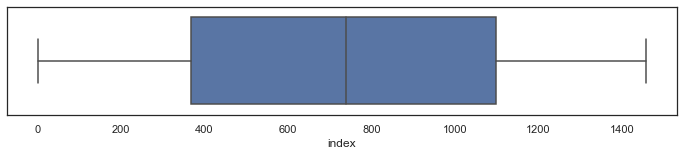

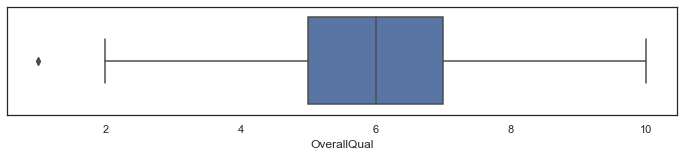

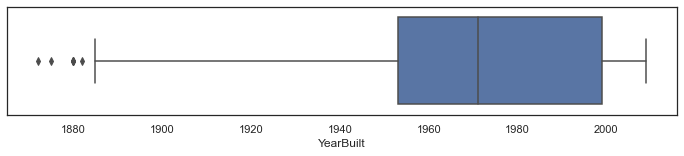

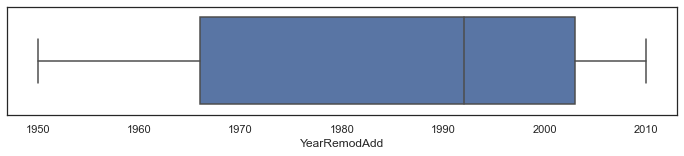

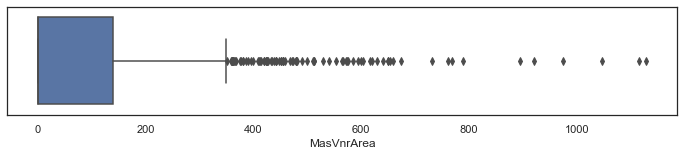

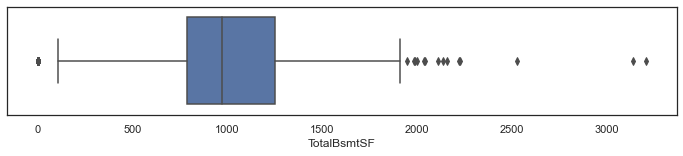

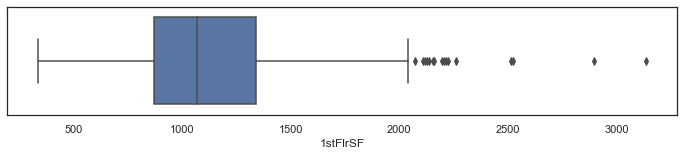

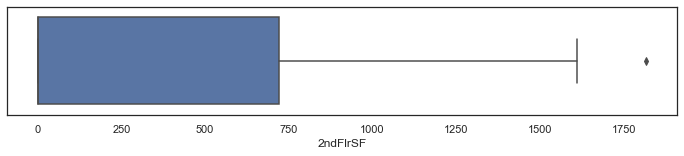

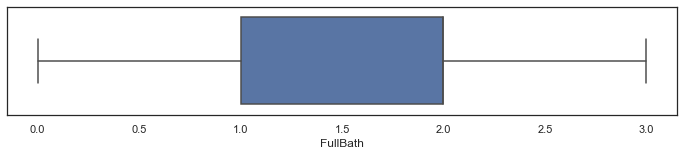

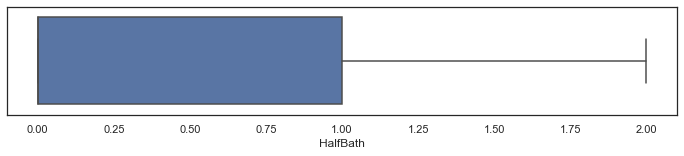

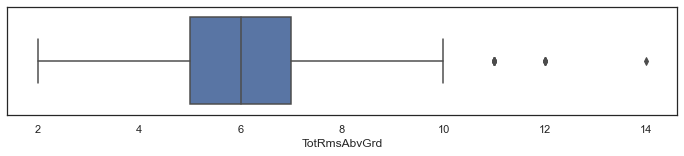

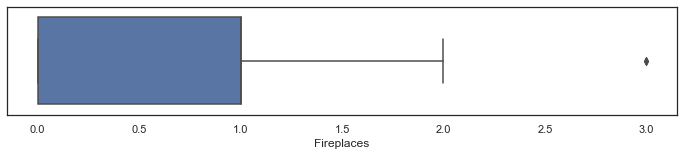

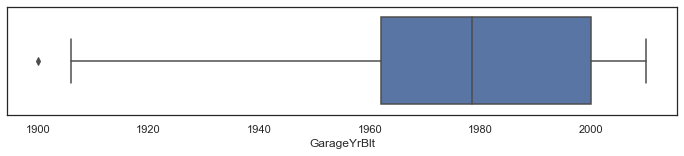

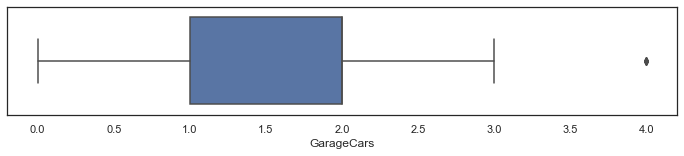

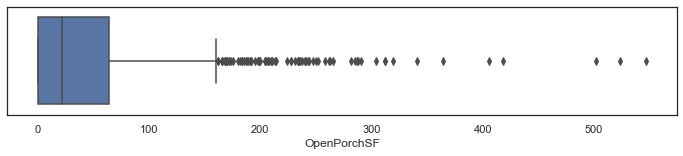

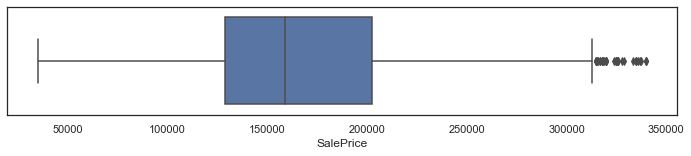

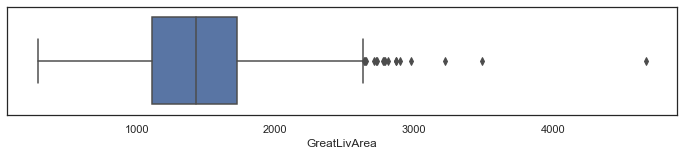

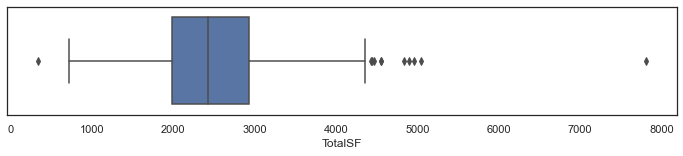

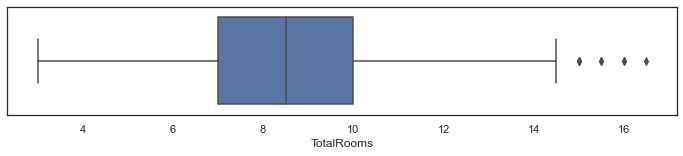

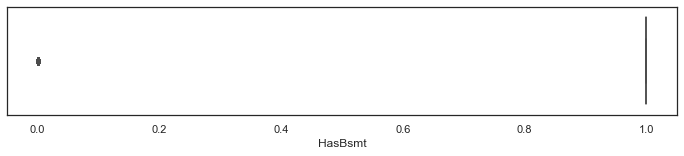

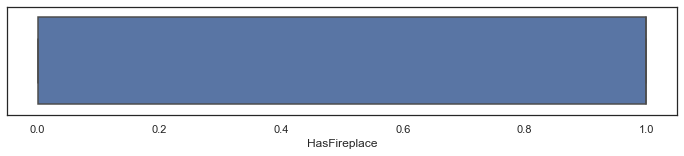

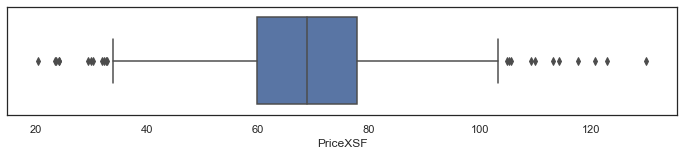

In [61]:
for col in df_ok:
    if df_ok[col].dtype == np.float64 or df_ok[col].dtype == np.int64:
        fig_dims = (12, 2)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.boxplot(x=df_ok[col],ax=ax)

In [62]:
# Remove manually the most evident outliers
df_ok = df_ok[df_ok['TotalBsmtSF'] < 2500]
df_ok = df_ok[df_ok['1stFlrSF'] < 2500]
df_ok = df_ok[df_ok['2ndFlrSF'] < 1600]
df_ok = df_ok[df_ok['OpenPorchSF'] < 450]
df_ok = df_ok[df_ok['GreatLivArea'] < 4000]
df_ok = df_ok[df_ok['TotalSF'] < 6000]

### Target variable study

In [63]:
df_ok.shape

(1383, 55)

In [64]:
df_ok.columns

Index(['index', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'PavedDrive', 'OpenPorchSF',
       'SaleType', 'SaleCondition', 'SalePrice', 'GreatLivArea', 'TotalSF',
       'TotalRooms', 'HasBsmt', 'HasFireplace', 'PriceXSF'],
      dtype='object')

In [65]:
df_ok.head()

,index,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,...,OpenPorchSF,SaleType,SaleCondition,SalePrice,GreatLivArea,TotalSF,TotalRooms,HasBsmt,HasFireplace,PriceXSF
0,0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,...,61,WD,Normal,208500,1710,2566,11.5,1,0,81.254871
1,1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,...,0,WD,Normal,181500,1262,2524,8.0,1,1,71.909667
2,2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,...,42,WD,Normal,223500,1786,2706,9.5,1,1,82.594235
3,3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,...,35,WD,Abnorml,140000,1717,2473,9.0,1,1,56.611403
4,4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,...,84,WD,Normal,250000,2198,3343,12.5,1,1,74.783129


In [66]:
df_ok.OverallQual.value_counts()

5     395
6     371
7     312
8     143
4     115
9      20
3      20
2       3
10      2
1       2
Name: OverallQual, dtype: int64

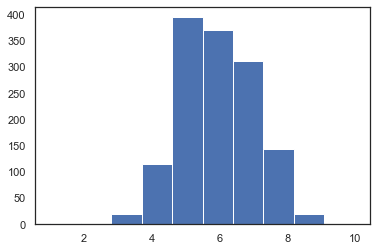

In [67]:
plt.hist(df_ok.OverallQual)
plt.show()

In [68]:
def house_class(x):

        if (x < 5):
            return 0
        elif (x >= 5 and x < 8):
            return 1
        else:  
            return 2

In [69]:
df_ok['OverallQual'] = df_ok['OverallQual'].apply(house_class)

In [70]:
df_ok['OverallQual'].value_counts()

# 0 modest quality, aka below the average
# 1 normal quality, aka average
# 2 superior quality, aka above the average

1    1078
2     165
0     140
Name: OverallQual, dtype: int64

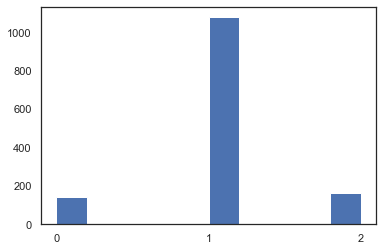

In [82]:
plt.hist(df_ok.OverallQual)
plt.xticks(np.arange(0, 3, 1))
plt.show()

In [71]:
quality = df_ok.groupby(["OverallQual"])
quality.mean().reset_index()

,OverallQual,index,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,HalfBath,...,GarageYrBlt,GarageCars,OpenPorchSF,SalePrice,GreatLivArea,TotalSF,TotalRooms,HasBsmt,HasFireplace,PriceXSF
0,0,766.407143,1945.771429,1966.992857,14.035714,712.064286,928.271429,154.864286,1.178571,0.114286,...,1965.972926,1.150000,20.771429,103907.014286,1073.464286,1785.528571,7.050000,0.857143,0.142857,60.913027
1,1,728.975881,1969.099258,1983.467532,80.195201,996.287570,1102.034323,339.499072,1.515770,0.388683,...,1975.623170,1.675325,41.376623,163618.088126,1435.958256,2432.245826,8.490260,0.984230,0.498145,68.061194
2,2,729.127273,1998.357576,2001.884848,202.761729,1387.872727,1419.672727,441.503030,1.939394,0.466667,...,1999.439431,2.442424,76.812121,263340.824242,1857.557576,3245.430303,9.960606,1.000000,0.842424,81.371597


In [72]:
pd.DataFrame(abs(df_ok.corr()['OverallQual']).sort_values(ascending = False))

,OverallQual
OverallQual,1.000000
SalePrice,0.648109
TotalSF,0.516739
TotalBsmtSF,0.430911
GarageCars,0.425719
YearBuilt,0.416331
GreatLivArea,0.414087
YearRemodAdd,0.397746
1stFlrSF,0.354427
PriceXSF,0.349779


In [73]:
# There are some features with very little correlation with the target feature. Let's drop them

df_ok.drop(["HasBsmt","HalfBath", "2ndFlrSF"], axis=1, inplace=True)

In [74]:
df_ok.shape

(1383, 52)

### Encoding categorical features

In [75]:
# Encode aka convert categorical features to numbers

data_cat = df_ok.select_dtypes(include = ['object'])
data_cat

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,BldgType,HouseStyle,RoofStyle,...,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,1Fam,1Story,Gable,...,Y,SBrkr,TA,Typ,Attchd,RFn,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,1Fam,2Story,Gable,...,Y,SBrkr,TA,Typ,Attchd,RFn,TA,Y,WD,Normal
1389,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,1Fam,1Story,Gable,...,Y,SBrkr,TA,Min1,Attchd,Unf,TA,Y,WD,Normal
1390,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,1Fam,2Story,Gable,...,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,Y,WD,Normal
1391,RL,Pave,Reg,Lvl,Inside,Gtl,NAmes,1Fam,1Story,Hip,...,Y,FuseA,Gd,Typ,Attchd,Unf,TA,Y,WD,Normal


In [76]:
data_cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

<AxesSubplot:xlabel='OverallQual', ylabel='Neighborhood'>

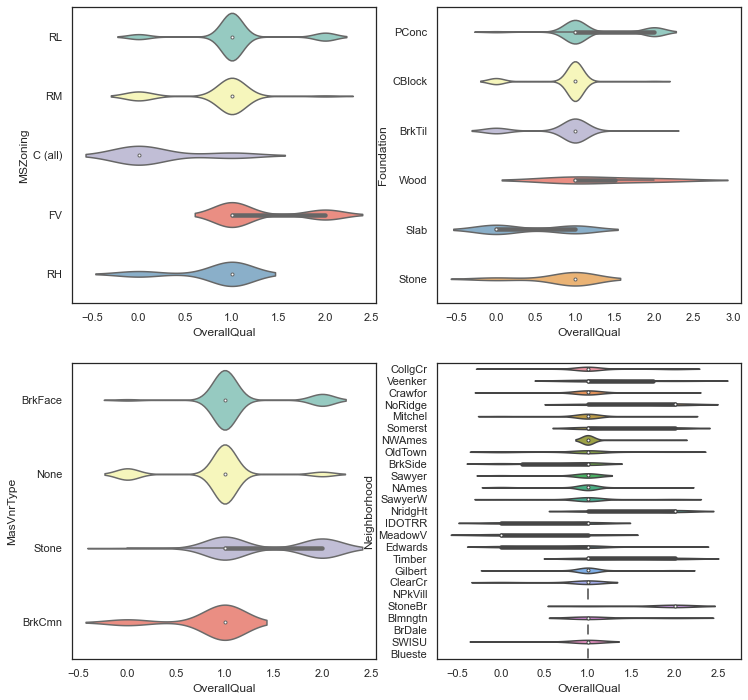

In [105]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(12, 12))
sns.set_palette("Set3")
sns.violinplot(x="OverallQual", y="MSZoning", data=df_ok, ax=ax1)
sns.violinplot(x="OverallQual", y="Foundation", data=df_ok, ax=ax2)
sns.violinplot(x="OverallQual", y="MasVnrType", data=df_ok, ax=ax3)
sns.violinplot(x="OverallQual", y="Neighborhood", data=df_ok, ax=ax4)

In [1771]:
def find_categorical_uniques(df):
    categorical_col = []
    for column in df.columns:
        if df[column].dtype == object and len(df[column].unique()) <= 20:
            categorical_col.append(column)
            print(f"{column} : {df[column].unique()}")
            print("====================================")
            print()
    return categorical_col

In [1772]:
find_categorical_uniques(data_cat)

MSZoning : ['RL' 'RM' 'C (all)' 'FV' 'RH']

Street : ['Pave' 'Grvl']

LotShape : ['Reg' 'IR1' 'IR2' 'IR3']

LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']

LotConfig : ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

LandSlope : ['Gtl' 'Mod' 'Sev']

BldgType : ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']

HouseStyle : ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']

RoofStyle : ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']

RoofMatl : ['CompShg' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'WdShngl' 'Roll']

Exterior1st : ['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'CemntBd' 'Plywood'
 'AsbShng' 'Stucco' 'WdShing' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']

Exterior2nd : ['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Other'
 'Stone' 'CBlock']

MasVnrType : ['BrkFace' 'None' 'Stone' 'BrkCmn']

ExterQual : ['Gd' 'TA' 'Ex' 'Fa']

ExterCond : ['TA' 'Gd' 'Fa' 'Po' 'Ex']

Foundation : ['P

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [1773]:
data_cat.PavedDrive.value_counts()

Y    1264
N      89
P      30
Name: PavedDrive, dtype: int64

In [1774]:
data_cat.CentralAir.value_counts()

Y    1289
N      94
Name: CentralAir, dtype: int64

In [1775]:
data_cat.Street.value_counts()

Pave    1378
Grvl       5
Name: Street, dtype: int64

In [1776]:
# These are some ordinal features that I will encode manually

dict_enc = dict(Po=0,Fa=1,TA=2,Gd=3,Ex=4)

df_ok.GarageQual = df_ok.GarageQual.map(dict_enc)
df_ok.KitchenQual = df_ok.KitchenQual.map(dict_enc)
df_ok.HeatingQC = df_ok.HeatingQC.map(dict_enc)
df_ok.BsmtCond = df_ok.BsmtCond.map(dict_enc)
df_ok.BsmtQual = df_ok.BsmtQual.map(dict_enc)
df_ok.ExterCond = df_ok.ExterCond.map(dict_enc)
df_ok.ExterQual = df_ok.ExterQual.map(dict_enc)


dict_enc2 = dict(N=0,P=1,Y=2)

df_ok.PavedDrive = df_ok.PavedDrive.map(dict_enc2)


dict_enc3 = dict(No=0, Gd=3 , Mn=1 , Av=2)

df_ok.BsmtExposure = df_ok.BsmtExposure.map(dict_enc3)

In [1777]:
# Manually encode boolean / 2 categories features

dict_bool = dict(N=0,Y=1)
df_ok.CentralAir = df_ok.CentralAir.map(dict_bool)


dict_bool2 = dict(Grvl=0,Pave=1)
df_ok.Street = df_ok.Street.map(dict_bool2)

In [1778]:
data_cat = df_ok.select_dtypes(include = ['object'])
data_cat.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1779]:
pd.DataFrame(abs(df_ok.corr()['OverallQual']).sort_values(ascending = False))

,OverallQual
OverallQual,1.000000
SalePrice,0.648109
TotalSF,0.516739
ExterQual,0.510150
KitchenQual,0.488720
BsmtQual,0.456665
TotalBsmtSF,0.430911
GarageCars,0.425719
YearBuilt,0.416331
GreatLivArea,0.414087


In [1780]:
# There are some features with very little correlation with the target feature. Let's drop them

df_ok.drop(["ExterCond","Street","GarageQual","BsmtCond","BsmtExposure","PavedDrive","CentralAir","OpenPorchSF"
           ], axis=1, inplace=True)

In [1781]:
df_ok.shape

(1383, 44)

In [1782]:
data_cat = df_ok.select_dtypes(include = ['object'])
data_cat.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'Heating', 'Electrical', 'Functional', 'GarageType',
       'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

In [1783]:
df_enc = ce.BinaryEncoder().fit_transform(data_cat)
df_enc.reset_index(inplace=True)
df_enc

,index,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,LotShape_0,LotShape_1,LotShape_2,LandContour_0,LandContour_1,...,GarageFinish_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
2,2,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
3,3,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,4,0,0,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1388,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1379,1389,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1380,1390,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,1
1381,1391,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


### Feature scaling

In [1784]:
# Scaling numerical features

data_num = df_ok.select_dtypes(include = ['int64', 'float64'])

In [1785]:
data_num = data_num.select_dtypes(include = ['int64', 'float64'])

In [1786]:
data_num.columns

Index(['index', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'SalePrice', 'GreatLivArea', 'TotalSF', 'TotalRooms',
       'HasFireplace', 'PriceXSF'],
      dtype='object')

In [1787]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1383 entries, 0 to 1392
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1383 non-null   int64  
 1   OverallQual   1383 non-null   int64  
 2   YearBuilt     1383 non-null   int64  
 3   YearRemodAdd  1383 non-null   int64  
 4   MasVnrArea    1383 non-null   float64
 5   ExterQual     1383 non-null   int64  
 6   BsmtQual      1383 non-null   int64  
 7   TotalBsmtSF   1383 non-null   int64  
 8   HeatingQC     1383 non-null   int64  
 9   1stFlrSF      1383 non-null   int64  
 10  FullBath      1383 non-null   int64  
 11  KitchenQual   1383 non-null   int64  
 12  TotRmsAbvGrd  1383 non-null   int64  
 13  Fireplaces    1383 non-null   int64  
 14  GarageYrBlt   1383 non-null   float64
 15  GarageCars    1383 non-null   int64  
 16  SalePrice     1383 non-null   int64  
 17  GreatLivArea  1383 non-null   int64  
 18  TotalSF       1383 non-null 

In [1788]:
data_noscale = data_num.OverallQual
data_noscale.reset_index(drop=True, inplace=True)

In [1789]:
data_toscale = data_num.drop(["OverallQual"], axis=1)

In [1790]:
data_toscale.head()

,index,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,FullBath,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,SalePrice,GreatLivArea,TotalSF,TotalRooms,HasFireplace,PriceXSF
0,0,2003,2003,196.0,3,3,856,4,856,2,...,8,0,2003.0,2,208500,1710,2566,11.5,0,81.254871
1,1,1976,1976,0.0,2,3,1262,4,1262,2,...,6,1,1976.0,2,181500,1262,2524,8.0,1,71.909667
2,2,2001,2002,162.0,3,3,920,4,920,2,...,6,1,2001.0,2,223500,1786,2706,9.5,1,82.594235
3,3,1915,1970,0.0,2,2,756,3,961,1,...,7,1,1998.0,3,140000,1717,2473,9.0,1,56.611403
4,4,2000,2000,350.0,3,3,1145,4,1145,2,...,9,1,2000.0,3,250000,2198,3343,12.5,1,74.783129


In [1791]:
dataname = data_toscale.columns

In [1792]:
data_scaled = RobustScaler().fit_transform(data_toscale)
data_scaled = pd.DataFrame(data_scaled, columns= dataname)
data_scaled.reset_index(inplace=True)
data_scaled.drop(["index", "level_0"], axis=1, inplace=True)
data_scaled

,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,SalePrice,GreatLivArea,TotalSF,TotalRooms,HasFireplace,PriceXSF
0,0.695652,0.297297,1.390071,1.0,1.0,-0.248366,0.5,-0.442797,0.0,1.0,1.0,-1.0,0.644575,0.0,0.675289,0.463435,0.159830,1.2,-1.0,0.693385
1,0.108696,-0.432432,0.000000,0.0,1.0,0.636166,0.5,0.417373,0.0,0.0,0.0,0.0,-0.065952,0.0,0.307692,-0.272802,0.115077,-0.2,0.0,0.167653
2,0.652174,0.270270,1.148936,1.0,1.0,-0.108932,0.5,-0.307203,0.0,1.0,0.0,0.0,0.591943,0.0,0.879510,0.588332,0.309004,0.4,0.0,0.768733
3,-1.217391,-0.594595,0.000000,0.0,0.0,-0.466231,0.0,-0.220339,-1.0,1.0,0.5,0.0,0.512996,1.0,-0.257318,0.474938,0.060735,0.2,0.0,-0.692979
4,0.630435,0.216216,2.482270,1.0,1.0,0.381264,0.5,0.169492,0.0,1.0,1.5,0.0,0.565627,1.0,1.240300,1.265407,0.987746,1.6,0.0,0.329305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.608696,0.216216,0.000000,0.0,1.0,-0.037037,0.5,-0.237288,0.0,0.0,0.5,0.0,0.539311,0.0,0.219197,0.359901,0.196058,0.4,0.0,-0.091239
1379,0.152174,-0.108108,0.843972,0.0,1.0,1.246187,-0.5,2.135593,0.0,0.0,0.5,1.0,-0.013320,0.0,0.695711,1.059984,1.277571,0.6,0.0,-0.609725
1380,-0.652174,0.378378,0.000000,2.0,0.0,0.396514,0.5,0.260593,0.0,1.0,1.5,1.0,-0.987004,-1.0,1.464942,1.498767,1.146510,1.0,0.0,0.415613
1381,-0.456522,0.108108,0.000000,0.0,0.0,0.235294,0.0,0.027542,-1.0,1.0,-0.5,-1.0,-0.750162,-1.0,-0.228387,-0.575185,-0.277038,-0.6,-1.0,-0.169268


In [1793]:
df_scal = pd.concat([data_scaled, data_num.OverallQual], axis=1)
df_scal

,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,FullBath,KitchenQual,...,Fireplaces,GarageYrBlt,GarageCars,SalePrice,GreatLivArea,TotalSF,TotalRooms,HasFireplace,PriceXSF,OverallQual
0,0.695652,0.297297,1.390071,1.0,1.0,-0.248366,0.5,-0.442797,0.0,1.0,...,-1.0,0.644575,0.0,0.675289,0.463435,0.159830,1.2,-1.0,0.693385,1
1,0.108696,-0.432432,0.000000,0.0,1.0,0.636166,0.5,0.417373,0.0,0.0,...,0.0,-0.065952,0.0,0.307692,-0.272802,0.115077,-0.2,0.0,0.167653,1
2,0.652174,0.270270,1.148936,1.0,1.0,-0.108932,0.5,-0.307203,0.0,1.0,...,0.0,0.591943,0.0,0.879510,0.588332,0.309004,0.4,0.0,0.768733,1
3,-1.217391,-0.594595,0.000000,0.0,0.0,-0.466231,0.0,-0.220339,-1.0,1.0,...,0.0,0.512996,1.0,-0.257318,0.474938,0.060735,0.2,0.0,-0.692979,1
4,0.630435,0.216216,2.482270,1.0,1.0,0.381264,0.5,0.169492,0.0,1.0,...,0.0,0.565627,1.0,1.240300,1.265407,0.987746,1.6,0.0,0.329305,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.608696,0.216216,0.000000,0.0,1.0,-0.037037,0.5,-0.237288,0.0,0.0,...,0.0,0.539311,0.0,0.219197,0.359901,0.196058,0.4,0.0,-0.091239,1
1379,0.152174,-0.108108,0.843972,0.0,1.0,1.246187,-0.5,2.135593,0.0,0.0,...,1.0,-0.013320,0.0,0.695711,1.059984,1.277571,0.6,0.0,-0.609725,1
1380,-0.652174,0.378378,0.000000,2.0,0.0,0.396514,0.5,0.260593,0.0,1.0,...,1.0,-0.987004,-1.0,1.464942,1.498767,1.146510,1.0,0.0,0.415613,1
1381,-0.456522,0.108108,0.000000,0.0,0.0,0.235294,0.0,0.027542,-1.0,1.0,...,-1.0,-0.750162,-1.0,-0.228387,-0.575185,-0.277038,-0.6,-1.0,-0.169268,1


In [1794]:
df_new = pd.concat([df_scal, df_enc], axis=1)
df_new

,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,TotalBsmtSF,HeatingQC,1stFlrSF,FullBath,KitchenQual,...,GarageFinish_2,SaleType_0,SaleType_1,SaleType_2,SaleType_3,SaleType_4,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3
0,0.695652,0.297297,1.390071,1.0,1.0,-0.248366,0.5,-0.442797,0.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1,0.108696,-0.432432,0.000000,0.0,1.0,0.636166,0.5,0.417373,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
2,0.652174,0.270270,1.148936,1.0,1.0,-0.108932,0.5,-0.307203,0.0,1.0,...,1,0,0,0,0,1,0,0,0,1
3,-1.217391,-0.594595,0.000000,0.0,0.0,-0.466231,0.0,-0.220339,-1.0,1.0,...,0,0,0,0,0,1,0,0,1,0
4,0.630435,0.216216,2.482270,1.0,1.0,0.381264,0.5,0.169492,0.0,1.0,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0.608696,0.216216,0.000000,0.0,1.0,-0.037037,0.5,-0.237288,0.0,0.0,...,1,0,0,0,0,1,0,0,0,1
1379,0.152174,-0.108108,0.843972,0.0,1.0,1.246187,-0.5,2.135593,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
1380,-0.652174,0.378378,0.000000,2.0,0.0,0.396514,0.5,0.260593,0.0,1.0,...,1,0,0,0,0,1,0,0,0,1
1381,-0.456522,0.108108,0.000000,0.0,0.0,0.235294,0.0,0.027542,-1.0,1.0,...,0,0,0,0,0,1,0,0,0,1


#  <font color='#0044FB'>Machine Learning Modeling</font>

#  <font color='#0044FB'>Classification</font>

In this part I will predict the overall quality of a house using various types of classification algorithms.

Property assets are a safe investment method that many people have trusted for years. How do you classify property assets at the investment level and for legal purposes?

There are many different ways of classifying property assets, but one of the most common ones is to do it depending on the quality of the property.
This classification is very important for investing in housing. A property with a high quality will not be the same as one whose quality is rather low. The qualities in this case are usually divided into:

- Simple quality. Those qualities that are below average
- Secondly, normal quality, which is the norm for buildings
- Superior quality, for those properties whose qualities are above average

These classifications are vital to know if we are making a good investment. For example, an asset may not be as interesting as we think if it is a property in great location but with poor qualities. The more information we have about the assets to invest in, the easier it will be to make a good financial transaction.

In [1795]:
# Separating our independent and dependent variables

X = df_new.drop(['OverallQual'], axis = 1)
y = df_new['OverallQual']

In [1796]:
# Perform SMOTE over-sampling as we deal with quite inbalanced data

X, y = SMOTE().fit_sample(X, y)

In [1797]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=0)

## <font color=' #FD9404'>Random Forest</font>

In [1798]:
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(X_train, y_train)

RandomForestClassifier()

In [1799]:
Allmetrics(rand_forest, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[778   0   0]
 [  0 738   0]
 [  0   0 747]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[286  14   0]
 [ 15 304  21]
 [  0   7 324]]
 Classification report 
    precision    recall  f1-score  support
0   0.950166  0.953333  0.951747    300.0
1   0.935385  0.894118  0.914286    340.0
2   0.939130  0.978852  0.958580    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.937677   0.938182  0.937215  0.937186
test   0.941298   0.941560  0.942101  0.941538


,Accuracy,Precision,Recall,f1
Train,0.937677,0.938182,0.937215,0.937186
test,0.941298,0.941560,0.942101,0.941538


In [1800]:
cv = StratifiedKFold(n_splits=10, random_state = 76)
y_pred = cross_val_predict(rand_forest, X_train, y_train, cv=cv)

rf_matrix = metrics.confusion_matrix(y_train, y_pred)
print(rf_matrix)

[[746  32   0]
 [ 51 660  27]
 [  1  28 718]]


Text(0.5, 12.5, 'Predicted label')

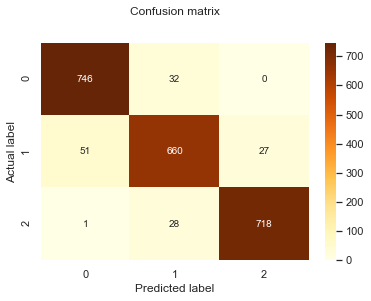

In [1809]:
p = sns.heatmap(pd.DataFrame(rf_matrix), annot=True, cmap="YlOrBr" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [1801]:
calc_all_scores_multiclass(rf_matrix)

------------------
Accuracy: 0.9386
------------------
Recall of class 0: 0.9589
Recall of class 1: 0.8943
Recall of class 2: 0.9612
------------------
Precision of class 0: 0.9348
Precision of class 1: 0.9167
Precision of class 2: 0.9638
------------------
F1 score of class 0: 0.9467
F1 score of class 1: 0.9053
F1 score of class 2: 0.9625
------------------
Average of recall scores: 0.9381186277354562
------------------
Average of precision scores: 0.9384207162200804
------------------
Average of F1 scores: 0.9624664879356568
------------------


(0.9385771100309324,
 [0.9588688946015425, 0.8943089430894309, 0.9611780455153949],
 [0.9348370927318296, 0.9166666666666666, 0.963758389261745],
 0.9624664879356568,
 0.9381186277354562,
 0.9384207162200804,
 0.9624664879356568)

### Model tuning

In [1802]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.3, random_state=15)


parameters = {'n_estimators':[120,130,140,145,150,155,160,1000, 1400],
              'max_depth':range(1,10),
              'criterion': ['gini', 'entropy']}

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [120, 130, 140, 145, 150, 155, 160,
                                          1000, 1400]})

In [1803]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 1400}

In [1804]:
grid.best_score_

0.9219440353460973

In [1812]:
rf_grid = grid.best_estimator_
rf_grid.score(X_train, y_train)

0.9805567830313743

In [1813]:
Allmetrics(rf_grid, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[775   3   0]
 [ 26 701  11]
 [  0   4 743]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[287  13   0]
 [ 23 291  26]
 [  0   5 326]]
 Classification report 
    precision    recall  f1-score  support
0   0.925806  0.956667  0.940984    300.0
1   0.941748  0.855882  0.896764    340.0
2   0.926136  0.984894  0.954612    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.929280   0.930428  0.928504  0.928375
test   0.930999   0.931230  0.932481  0.930787


,Accuracy,Precision,Recall,f1
Train,0.929280,0.930428,0.928504,0.928375
test,0.930999,0.931230,0.932481,0.930787


## <font color=' #FD9404'>Logistic Regression</font>

In [1814]:
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42)
                             
logreg.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [1815]:
Allmetrics(logreg, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[721  57   0]
 [ 27 685  26]
 [  1  38 708]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[273  27   0]
 [ 14 306  20]
 [  1  12 318]]
 Classification report 
    precision    recall  f1-score  support
0   0.947917  0.910000  0.928571    300.0
1   0.886957  0.900000  0.893431    340.0
2   0.940828  0.960725  0.950673    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.916927   0.918333  0.916810  0.916959
test   0.923790   0.925234  0.923575  0.924225


,Accuracy,Precision,Recall,f1
Train,0.916927,0.918333,0.916810,0.916959
test,0.923790,0.925234,0.923575,0.924225


### Model tuning

In [1816]:
cv = StratifiedShuffleSplit(n_splits=10, test_size=.3, random_state=15)

C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]

grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = {'penalty': ['l1','l2'], 'C': C_vals},
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv)
                          
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [1817]:
grid.best_params_

{'C': 0.5, 'penalty': 'l2'}

In [1818]:
grid.best_score_

0.8963181148748159

In [1819]:
log_grid = grid.best_estimator_
log_grid.score(X_train, y_train)

0.8846663720724701

In [1820]:
Allmetrics(log_grid, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[691  87   0]
 [ 80 615  43]
 [  5  46 696]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[265  35   0]
 [ 27 284  29]
 [  2  18 311]]
 Classification report 
    precision    recall  f1-score  support
0   0.901361  0.883333  0.892256    300.0
1   0.842730  0.835294  0.838996    340.0
2   0.914706  0.939577  0.926975    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.887312   0.888213  0.886700  0.886453
test   0.885685   0.886265  0.886068  0.886075


,Accuracy,Precision,Recall,f1
Train,0.887312,0.888213,0.886700,0.886453
test,0.885685,0.886265,0.886068,0.886075


## <font color=' #FD9404'>K-Nearest Neighbours</font>

In [1821]:
knn = KNeighborsClassifier(metric='minkowski', p=2)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [1822]:
Allmetrics(knn, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[730  45   3]
 [178 449 111]
 [  8  25 714]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[255  42   3]
 [109 160  71]
 [  8  31 292]]
 Classification report 
    precision    recall  f1-score  support
0   0.685484  0.850000  0.758929    300.0
1   0.686695  0.470588  0.558464    340.0
2   0.797814  0.882175  0.837877    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.738848   0.733087  0.735886  0.723155
test   0.728115   0.723331  0.734254  0.718423


,Accuracy,Precision,Recall,f1
Train,0.738848,0.733087,0.735886,0.723155
test,0.728115,0.723331,0.734254,0.718423


### Model tuning

In [1823]:
k_range = range(1,31)
weights_options=['uniform','distance']
param = {'n_neighbors':k_range, 'weights':weights_options}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.3, random_state=15)

grid = GridSearchCV(KNeighborsClassifier(), param, cv=cv, verbose = False, n_jobs=-1)

grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [1824]:
grid.best_params_

{'n_neighbors': 1, 'weights': 'uniform'}

In [1825]:
grid.best_score_

0.7842415316642122

In [1826]:
knn_grid = grid.best_estimator_
knn_grid.score(X_train, y_train)

1.0

In [1827]:
Allmetrics(knn_grid, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[778   0   0]
 [  0 738   0]
 [  0   0 747]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[282  17   1]
 [ 85 186  69]
 [  0  28 303]]
 Classification report 
    precision    recall  f1-score  support
0   0.768392  0.940000  0.845577    300.0
1   0.805195  0.547059  0.651489    340.0
2   0.812332  0.915408  0.860795    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.804230   0.811236  0.801165  0.787445
test   0.794027   0.795307  0.800822  0.785954


,Accuracy,Precision,Recall,f1
Train,0.804230,0.811236,0.801165,0.787445
test,0.794027,0.795307,0.800822,0.785954


## <font color=' #FD9404'>SVM</font>

In [1828]:
sv = SVC(kernel='linear', C= 1.0)

sv.fit(X_train, y_train)

SVC(kernel='linear')

In [1829]:
Allmetrics(sv, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[725  53   0]
 [ 18 702  18]
 [  0  35 712]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[277  23   0]
 [ 11 312  17]
 [  1  13 317]]
 Classification report 
    precision    recall  f1-score  support
0   0.958478  0.923333  0.940577    300.0
1   0.896552  0.917647  0.906977    340.0
2   0.949102  0.957704  0.953383    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall        f1
Train  0.911171   0.912796  0.911087  0.911283
test   0.933059   0.934710  0.932895  0.933646


,Accuracy,Precision,Recall,f1
Train,0.911171,0.912796,0.911087,0.911283
test,0.933059,0.934710,0.932895,0.933646


### Model tuning

In [1830]:
Cs = [0.001, 0.01, 0.1, 1,1.5,2,2.5,3,4,5, 10]
gammas = [0.0001,0.001, 0.01, 0.1, 0.7,1]
#kernels = ["linear", "rbf", "poly"]
param_grid = {'C': Cs, 'gamma' : gammas}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.3, random_state=15)

grid_search = GridSearchCV(SVC(kernel = "rbf", probability=True), param_grid, cv=cv)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=SVC(probability=True),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 1.5, 2, 2.5, 3, 4, 5, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.7, 1]})

In [1831]:
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [1832]:
grid_search.best_score_

0.8837997054491901

In [1833]:
svm_grid = grid_search.best_estimator_
svm_grid.score(X_train,y_train)

1.0

In [1834]:
Allmetrics(svm_grid, X_train, y_train, X_test, y_test)

-----------------------------------------
TRAIN results
-----------------------------------------
Confusion Matrix 
 [[778   0   0]
 [  0 738   0]
 [  0   0 747]]
-----------------------------------------
TEST results
-----------------------------------------
Confusion Matrix 
 [[290  10   0]
 [ 38 269  33]
 [  0  15 316]]
 Classification report 
    precision    recall  f1-score  support
0   0.884146  0.966667  0.923567    300.0
1   0.914966  0.791176  0.848580    340.0
2   0.905444  0.954683  0.929412    331.0

++++++++ Summary of the Metrics +++++++++++++++++++++++++++++++++++
       Accuracy  Precision    Recall       f1
Train  0.913840   0.915213  0.912745  0.91151
test   0.901133   0.901519  0.904175  0.90052


,Accuracy,Precision,Recall,f1
Train,0.913840,0.915213,0.912745,0.91151
test,0.901133,0.901519,0.904175,0.90052


#  <font color='#0044FB'> Conclusions</font>

As we can see from the metrics results, the best performing algorithm is the Random Forest where the test metrics (accuracy, precision, recall and F1) are all at 94%.

The Random Forest model performance is followed by the SVM and Logistic Regression in terms of good metrics. KNN did not perform that good.